# Home Assignment No. 2: Part 2 (Theory)

In this part of the homework you are to solve several simple theoretical problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem right after the words **YOUR SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

# Task1. Bayesian methods (1 point)

For a dataset $D =(X,y) =\{(x_i,y_i)\}^m_{i=1}$, $x_i \in \mathbb{R}^d$, $y_i\in\mathbb{R}$ it is known,that 
$$y_i = w^T x_i + \epsilon$$
where $\epsilon \sim N(0,\sigma^2)$, $w  \sim N(0,\alpha I)$ . Suppose that $X^T X =I$, where $I$ is the identity matrix. Derive MAP estimation for $w$.

### Your solution
From Bayes theorem we know that $p(w | X, y) = \frac{p(y | X, w) p(w)}{p(y | X)}$.

Let's take the logarithm of both parts and write likelyhood of the data and prior distribution of weight:
$$
\log p(w | X, y) = 
\log \frac{p(y| X, w) p(w)}{p(y | X)} = 
\log p(y |X, w) + \log p(w) - \log p(y | X) = \\
\log \prod \limits_{i=1}^{m} \mathcal{N} \left(y_i | w^T x_i, \sigma^2 \right) - \log \alpha^{m / 2} - \log  2 \pi^{m / 2} - \frac{1}{2 \alpha} w^T w + \log p(y | X) = \\
m\log \frac{1}{\sqrt{2\pi\sigma^2}} - \frac{1}{2 \sigma^2} \sum\limits_{i=1}^{m} \left(y_i - w^Tx_i\right)^2 - \log \alpha^{m / 2} - \log  (2 \pi)^{m / 2} - \frac{1}{2 \alpha} w^T w + \log p(y | X) = \\
const - \frac{1}{2}\left(\frac{w^T w}{\alpha} + \frac{1}{\sigma^2} \sum\limits_{i=1}^{m}\left(y_i^2 - 2w^T x_i y_i + w^T x_i w^T x_i\right) \right).
$$

With this let's take a derivative to find MAP estimation.

$$
MAP(w) = 
argmin_{w} \left[\left(\frac{w^T w}{\alpha} + \frac{1}{\sigma^2} \sum \limits_{i=1}^{m}\left(y_i^2 - 2w^T x_i y_i + w^T w \right) \right) \right].
$$

$$
\frac{\partial \left(\frac{w^T w}{\alpha} + \frac{1}{\sigma^2} \sum \limits_{i=1}^{m}\left(y_i^2 - 2w^T x_i y_i + w^T w \right) \right)}{\partial w} =
(\frac{1}{\sigma} + \frac{1}{\alpha}) w - \frac{1}{\sigma^2} \sum \limits_{i=1}^{m} x_i y_i = 0 \\
\implies w = \frac{\sum \limits_{i=1}^{m} x_i y_i}{(\sigma + \frac{\sigma^2}{\alpha})}.
$$

# Task 2. Gaussian Processes 1 (1 point)

Let $\sigma_n(\mathbf{x}_*)$ be a predictive variance at point $\mathbf{x}_*$ of a Gaussian Process $f_n$ with zero mean and covariance $k(\cdot,\cdot)$ that was built using first $n$ training points.
Prove that for $\forall \mathbf{x}_*$ it holds
$$
    \sigma_{n}(\mathbf{x}_*) \leq \sigma_{n-1}(\mathbf{x}_*).
$$

### Your solution

# Task 3. Gaussian Processes 2 (1 point)

Consider you have gaussian distribution on $R$ with zero mean and differentiable by arguments covariation funtion $k(x, \tilde{x})$.Get an expression for the correlation between the implementation of a Gaussian process  $y(x) ∼ GP (0, k(x, x ^{\prime}))$ and its derivative $\frac{\partial y(\tilde x)}{\partial \tilde x}$ .

### Your solution
Let's denote $z(x) = \frac{\partial y}{\partial x}$.
Let's recall that:
$$
corr(x, y) = \frac{cov(x, y)}{\sqrt{\sigma(x) \sigma(y))}}.
$$

For our problem, let's firstly compute numerator:
$$
cov(y(x), z(\tilde{x})) = 
\mathbb{E} y(x) z(\tilde{x}) - \mathbb{E} y(x) \mathbb{E} z(\tilde{x}) = 
\mathbb{E} y(x) \frac{\partial y(\tilde{x})}{\partial \tilde{x}} = \\
\frac{\partial \mathbb{E} y(x) y(\tilde{x})}{\partial \tilde{x}} = 
\frac{\partial K(x, \tilde{x})}{\partial \tilde{x}}.
$$

Now let's compute denominator 

1. $$
\sigma (y(x)) = \mathbb{E} y^2(x) + \left[ \mathbb{E} y(x) \right]^2 = \mathbb{E} y(x) y(x) = K(x, x).
$$
2. $$
z(x) = 
\mathbb{E} z^2(x) + \left[ \mathbb{E} z(x) \right]^2 = 
\mathbb{E} \left( \frac{\partial y(\tilde(x))}{\partial \tilde{x}} \right)^2 = 
\mathbb{E} \left( \frac{\partial }{\partial \tilde(x)} y(\tilde{x}) \frac{\partial }{\partial \tilde(x)} y(\tilde{x}) \right) =
\frac{\partial^2 }{\partial \tilde{x}^2} \mathbb{E} y(\tilde{x}) y(\tilde{x}) = 
\frac{\partial^2 }{\partial \tilde{x}^2} K(\tilde{x}, \tilde{x}).
$$

Computations above are reasonable because of the two factors. Firstly, differentiation is a linear opearator as well as expextation. Secondly, $y$ is centered.

So, finally, we've got the answer:
$$
corr(y(x), z(\tilde{x})) = 
\frac{\frac{\partial K(x, \tilde{x})}{\partial \tilde{x}}}{ \sqrt{K(x, x) \frac{\partial^2 }{\partial \tilde{x}^2} K(\tilde{x}, \tilde{x})}}.
$$

# Task 4. Kernel theory (1 point)

Let $K(x, x'):\mathcal{X}\times \mathcal{X}\rightarrow \mathbb{R}$ be a PDS kernel,
and $\phi\colon \mathcal{X} \to \mathcal{H}$ its <b>unknown </b> feature mapping. For $x,x'\in\mathcal{X}$ derive the formula for the **distance** between $
\phi(x)$ and $\phi(x')$ in $\mathcal{H}$.
 

### Your solution
Given a kernel definition: $K(x, x') = \langle \phi(x), \phi(x') \rangle$, let's derive distance:
$$
dist(\phi(x), \phi(x')) = 
\sqrt{\langle \phi(x) - \phi(x'), \phi(x) - \phi(x') \rangle} =
\sqrt{\langle \phi(x), \phi(x) \rangle - 2 \langle \phi(x), \phi(x') \rangle + \langle \phi(x'), \phi(x') \rangle} = \\
\sqrt{K(x, x) - 2 K(x, x') + K(x', x')}.
$$

# Task 5. Naive Gradient Boosting Regression (1 points)

You are given a regression dataset, consisting of 5 samples with 1-dimensional feature vector $X$ and scalar target vector $y \in \mathbb{R}$:

|  x   |  y   | 
|:----:|:----:| 
|  10  |  1   | 
|  32  |  9   | 
|  46  |  13  | 
|  54  |  16  | 
|  63  |  23  | 

In this task you are asked to implement **3 steps of Gradient Boosting Regression** with decision tree stumps as the learners $h_0, h_1, h_2$. 

In order to complete this task:
1. Refer to the slides on naive boosting for regression in **Lecture 8**.
2. Assume that the initial model $f_0$ is the mean of the target vector $y$
3. According to the algorithm on the boosting approach for regression from **1.**, compute the residuals
4. Manually, find a suitable split among the $x_i$ for each decision tree weak model $h_t(X)$, which minimizes the loss function:

$$L_{\text{split_i}} = \frac{\text{Var}_{left\_split}*N_{1} + \text{Var}_{right\_split}*N_{2}}{N_{1}+N_{2}}$$

where  $\text{Var}$ is the variance of the values contained in each leaf, $N_1$ is the number of target values $y$ in the left leaf, $N_{2}$ - in the right leaf

5. Perform the Gradient Boosting step on the ensemble model $f_t$ with the resulting decision tree stump predictions (assume that the learning rate $lr=1.0$).

**Note on Decision Tree Stumps:** A decision tree stump is a decision tree, which consists only of the root and its immediate leaves. In case of this task, at each iteration you are asked to consider 5 different variants of the decision tree stumps $h_t^i$ - one variant for each of the split candidates $x_i$. You should choose the variant that minimizes the loss written above. The two leaves of the tree are formed according to the rule:

```python
if x_i < split:
    target_value -> left leaf
elif x_i >= split:
    target_value -> right leaf
```
**HINT:** Think about what should be `target_value` equal to in case of Gradient Boosting Regression.

The prediction of decision tree stump $h_t(x_i)$ is the mean of the values of the according leaf.



The task:

* Fill in the table - round the values of table up to the second digit after decimal point:

|   x  |   y  |$f_0$|$$y - f_0$$| $L$ |$h_0$|$f_1$|$$y-f_1$$| $L$ |$h_1$|$f_2$|$$y - f_2$$| $L$ |$h_2$|$F_3$|
|------|------|-----|-----------|-----|-----|-----|---------|-----|-----|-----|-----------|-----|-----|-----|
|  10  |  1   | 12.4|      -11.4|53.44| -7.4|    5|       -4|16.93|-1.42| 3.58|      -2.58| 8.90|-2.58|    1| 
|  32  |  9   | 12.4|       -3.4|20.95| -7.4|    5|        4|12.93|-1.42| 3.58|       5.42| 7.24| 0.65| 4.23|
|  46  |  13  | 12.4|        0.6|16.93| 4.93|17.33|    -4.33|16.93|-1.42|15.92|      -2.92| 7.57| 0.65|16.56|
|  54  |  16  | 12.4|        3.6|19.83| 4.93|17.33|    -1.33|13.80|-1.42|15.92|       0.08| 8.90| 0.65|16.56|
|  63  |  23  | 12.4|       10.6|25.35| 4.93|17.33|     5.67| 8.91| 5.67|   23|          0| 8.91| 0.65|23.65|


where $L$ is the loss, calculated by the formula for decision tree stumps above, for each of the 5 split variants of the decision tree stump at each iteration
* Write down the splits (the feature values) you have found for each of the tree stumps

* Insert the predictions of the full ensemble model and the split values, you have achieved after 3 iterations into the plotting cell below (**COPY AND PASTE** the last column from the table above and the splits list to the plotting cell below, instead of **#your solution**)

In [5]:
from statistics import mean 
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt

In [6]:
def plot_tree(x,F,stumps):
    x_range = np.arange(np.min(x), np.max(x)+1)
    x_r = []
    f_r = []
    stmps = [0] + stumps + [np.inf]
    for st in range(1,len(stmps)):
        x_r.extend([list(group) for k, group in groupby(x_range, lambda x: x<stmps[st] and x>=stmps[st-1]) if k])
        f_r.append([f_i for f_i,x_ii in zip(F,x) if x_ii<stmps[st] and x_ii>=stmps[st-1]])
    F_to_plot = []
    for ft in range(len(f_r)):
        #assert len(f_r) == len(x_r)
        if len(f_r[ft]) == 1:
            F_to_plot.extend([f_r[ft][0]]*len(x_r[ft]))
        elif len(f_r[ft]) > 1:
            F_to_plot.extend([mean(f_r[ft])]*len(x_r[ft]))
    return F_to_plot

## PLOTTING CELL##

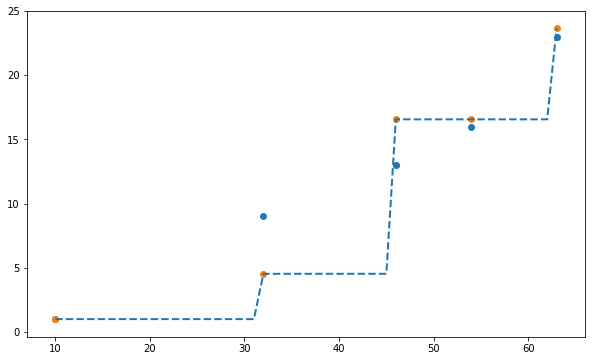

In [7]:
x = [10,32,46,54,63]
y = [1, 9, 13, 16, 23]

#note that the order of F(x_i) should be corresponding to the order of x_i in the table

############ INSERT YOUR SOLUTION HERE###############
F3 = np.array([1, 4.53, 16.56, 16.56, 23.65]) ####your solution#####
splits = np.array([46, 63, 32]) ####your solution####

boosted_F_plot = plot_tree(x, F3, stumps = list(np.sort(splits)))
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x,y, label = 'original')
ax.scatter(x, F3, label = 'predicted')
x_range = np.arange(np.min(x), np.max(x)+1)
ax.plot(x_range, boosted_F_plot,'--', linewidth=2, label = 'composite function')
plt.show()

# Task 6. AdaBoost (1 point)

For each of the following cases,explain how AdaBoost, as given in **Lecture 7**, will treat a weak hypothesis $h_t$ with weighted error $N_t(h_t , w_t )$. Also, in each case, explain why this behavior takes place.
1. $N_t = \frac{1}{2}$
2. $N_t > \frac{1}{2}$
3. $N_t = 0$

### Your solution
We will need an expression for coefficient alpha for the new weak learner from lectures:
$$
\alpha_t = \frac{1}{2} \log \frac{1 - N_t}{N_t}.
$$

Given the formula above, let's what we've got in each case.
1. $N_t = \frac{1}{2} \implies \alpha_t = 0$. This means that we do not take into account new learner.
2. $N_t > \frac{1}{2} \implies \alpha_t < 0$. This means that we've got coefficient below zero, so basically, when we multiply it on the predictions of a new classifier, we just invert it's predictions.
3. $N_t > \frac{1}{2} \implies \alpha_t = \infty$. This means that predictions of the previous classifiers are not important at all and we will take into account only the new one.